## Clustering of Countries for aid.

In [1]:
# for visualisation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data reading and understanding.

In [2]:
# set pandas option for better display
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',800)
pd.set_option('max_colwidth',100)

In [3]:
dat=pd.read_csv("D:\PYTHON_MAIN_COURSE(IIIT-Bnglr)\COURSE-3-ML_PRED.ANALYSIS_1\ASSIGNMENT\CLUSTERING_AND_PCA\Country-data.csv")

In [4]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# converting imports,exports ,health in terms of gdpp
dat['imports']=round((dat.imports*dat.gdpp)/100)
dat['health']=round((dat.health*dat.gdpp)/100)
dat['exports']=round((dat.exports*dat.gdpp)/100)

In [6]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


In [7]:
dat.shape

(167, 10)

In [8]:
dat.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
dat.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.622754,1056.754491,6588.401198,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.902072,1801.410229,14710.816178,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.000000,13.000000,1.000000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.000000,78.500000,640.000000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.000000,322.000000,2046.000000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,977.000000,7719.500000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.200000,3825.600000,15034.600000,41220.000000,16.640000,80.400000,5.322000,41840.000000
99%,153.400000,64794.260000,8410.040000,55371.720000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8664.000000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


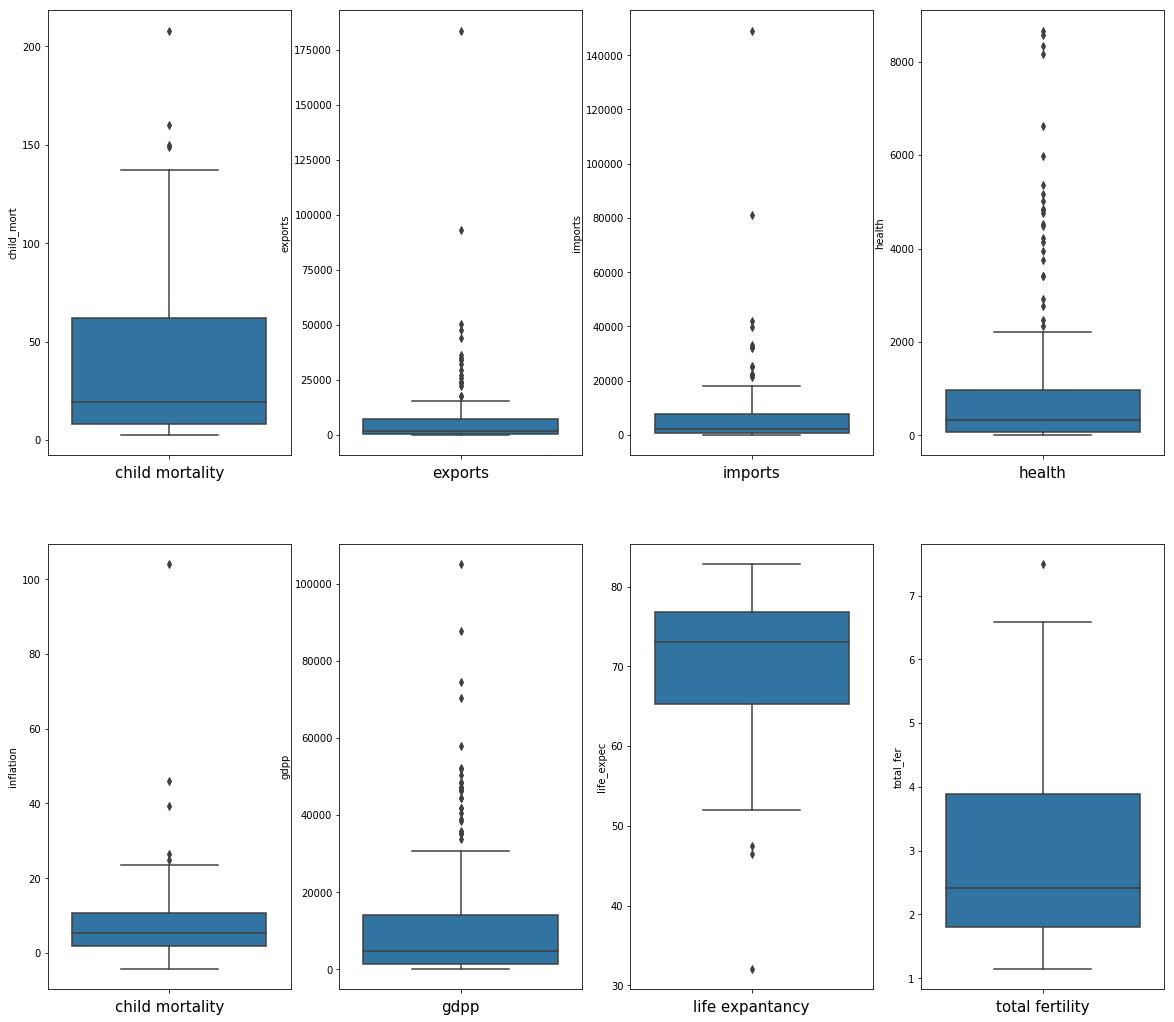

In [10]:

plt.figure(figsize=(20, 18))
plt.subplot(2,4,1)
sns.boxplot( y = 'child_mort', data =dat)
plt.xlabel("child mortality",fontsize=15)


plt.subplot(2,4,2)
sns.boxplot( y = 'exports', data =dat)
plt.xlabel("exports",fontsize=15)


plt.subplot(2,4,3)
sns.boxplot( y = 'imports', data =dat)
plt.xlabel("imports",fontsize=15)

plt.subplot(2,4,4)
sns.boxplot( y = 'health', data =dat)
plt.xlabel("health",fontsize=15)


plt.subplot(2,4,5)
sns.boxplot( y = 'inflation', data =dat)
plt.xlabel("child mortality",fontsize=15)

plt.subplot(2,4,6)
sns.boxplot( y = 'gdpp', data =dat)
plt.xlabel("gdpp",fontsize=15)


plt.subplot(2,4,7)
sns.boxplot( y = 'life_expec', data =dat)
plt.xlabel("life expantancy",fontsize=15)


plt.subplot(2,4,8)
sns.boxplot( y = 'total_fer', data =dat)
plt.xlabel("total fertility",fontsize=15)





plt.show()

###### outliers present in columns ,will be dealt after doing P.C.A

In [11]:
sum(dat.duplicated())

0

 no duplicated record present,no null values present in the dataframe

## Data Preparation.

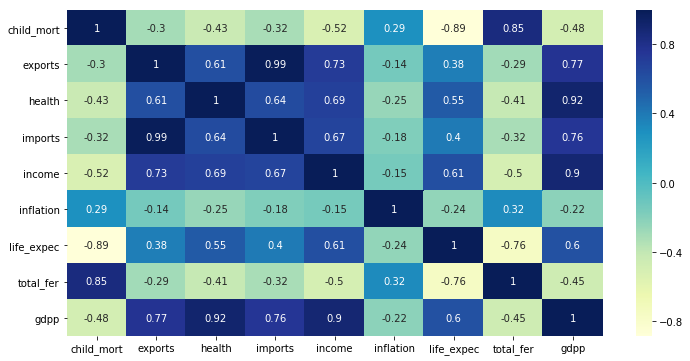

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(dat.corr(),cmap='YlGnBu', annot=True)
plt.show()

### child mortality has a high negative correlation with life_expantancy and positive correlation with total_fer.
### exports is highly correlated with imports.
### gdpp is highly correlated with income.

<Figure size 1296x720 with 0 Axes>

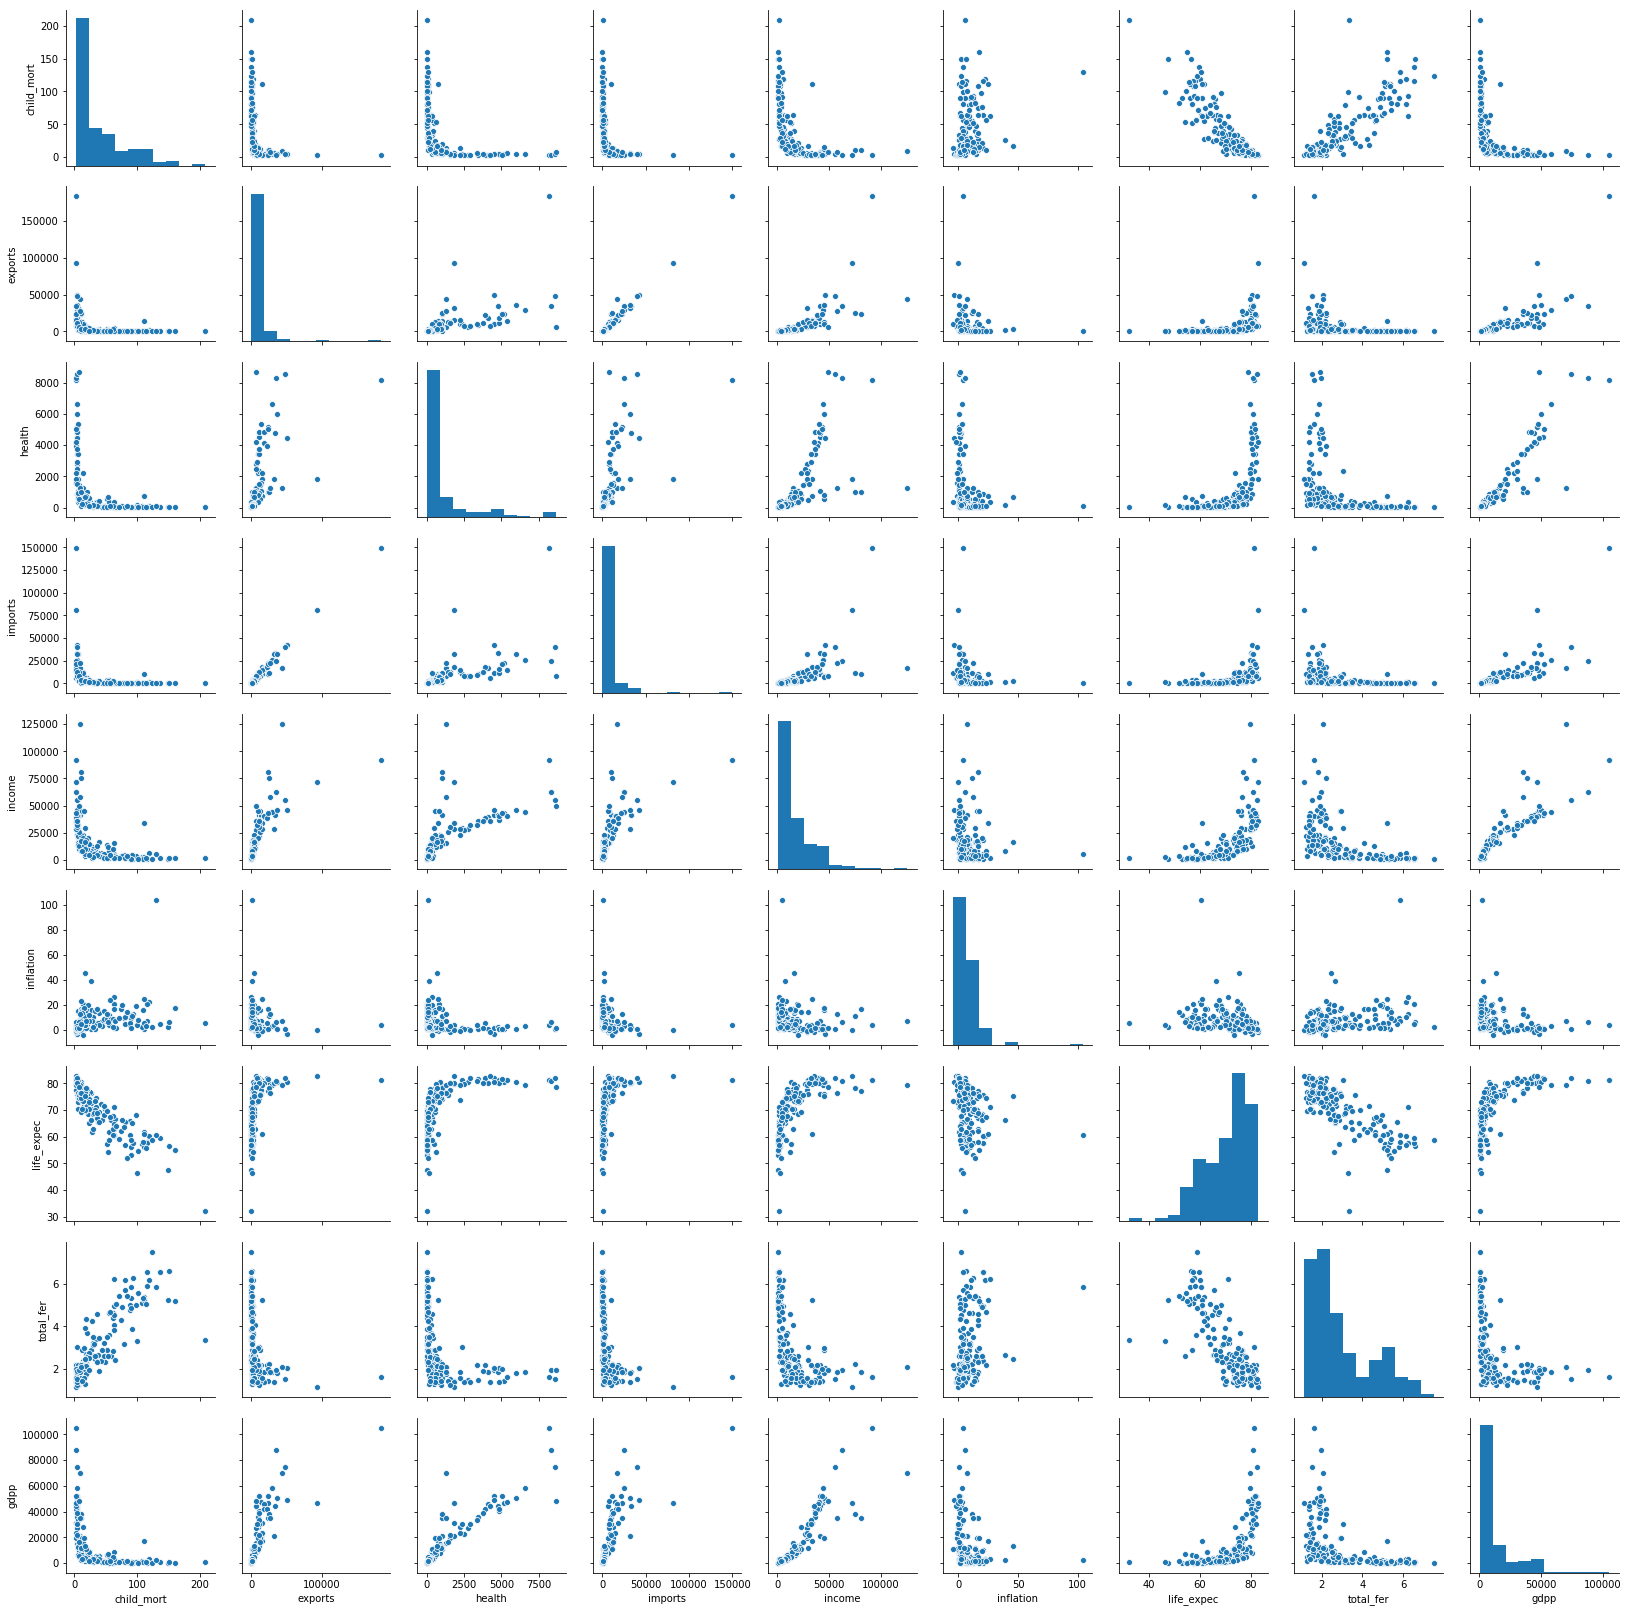

In [13]:
plt.figure(figsize=(18,10))
sns.pairplot(dat)
plt.show()

In [14]:
dat.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1947.0,834.0,1648.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,670.0,142.0,1459.0,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.0,4531.0,10847.0,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24060.0,5159.0,22418.0,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.0,343.0,1209.0,16000,13.800,69.1,1.92,5840


In [15]:
datm=dat.drop(['country'],axis=1)

In [16]:
datm.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### now standardizing the data for P.C.A.

In [17]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(datm)

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
dat2

array([[ 1.29153238, -0.41102789, -0.56500534, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35020202, -0.43917076, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31850561, -0.48482755, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36147434, -0.53827941, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216629, -0.55052879, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38396317, -0.54050657, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [19]:
## now going forward importing P.C.A module.
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=100)

In [20]:
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [21]:
#list of PCs
pca.components_

array([[-0.316393  ,  0.34288603,  0.35853277,  0.34486373,  0.38004139,
        -0.14308666,  0.34385764, -0.30284362,  0.3999879 ],
       [ 0.47626615,  0.39731451,  0.15504027,  0.37078481,  0.12838921,
         0.22125926, -0.36981815,  0.45971356,  0.2006275 ],
       [-0.15001409, -0.03056715, -0.07571556, -0.07217065,  0.14576554,
         0.94841742,  0.19675222, -0.07783613,  0.01033832],
       [-0.14805614,  0.44941926, -0.59973032,  0.46179103, -0.15480011,
        -0.0076453 , -0.01839243, -0.21392414, -0.36476151],
       [ 0.10198742, -0.03854694, -0.49319018, -0.25280144,  0.79407489,
        -0.136431  , -0.1540415 , -0.0203299 ,  0.08750512],
       [ 0.19658742, -0.03890527,  0.18069381, -0.01217555, -0.03814247,
         0.10840456, -0.5860092 , -0.75390267,  0.04537463],
       [ 0.76126687, -0.01367103, -0.06461566,  0.02718345, -0.02310106,
        -0.02207862,  0.58120925, -0.27314346, -0.04403491],
       [ 0.00643178, -0.05522604,  0.43006957,  0.13111805,  0

In [22]:
pca.explained_variance_ratio_

array([5.89372095e-01, 1.84450602e-01, 9.91148630e-02, 6.07246654e-02,
       3.02913981e-02, 2.45983236e-02, 9.39739936e-03, 1.55667077e-03,
       4.93982957e-04])

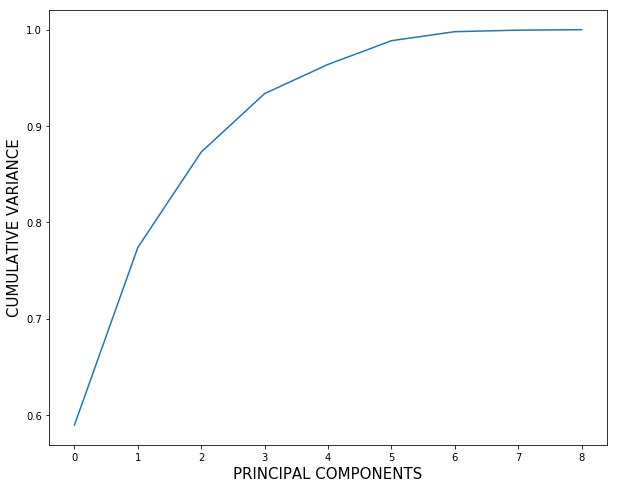

In [23]:
#The scree plot to see the ideL no of PCs
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PRINCIPAL COMPONENTS",fontsize=15)
plt.ylabel("CUMULATIVE VARIANCE",fontsize=15)
plt.show()

In [24]:
#Let's try and check the first three components now
colnames = list(dat.drop('country',axis=1).columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316393,0.476266,-0.150014
1,exports,0.342886,0.397315,-0.030567
2,health,0.358533,0.155040,-0.075716
3,imports,0.344864,0.370785,-0.072171
4,income,0.380041,0.128389,0.145766
5,inflation,-0.143087,0.221259,0.948417
6,life_expec,0.343858,-0.369818,0.196752
7,total_fer,-0.302844,0.459714,-0.077836
8,gdpp,0.399988,0.200627,0.010338


#### plot of PC1 vs PC2 to see how things look...

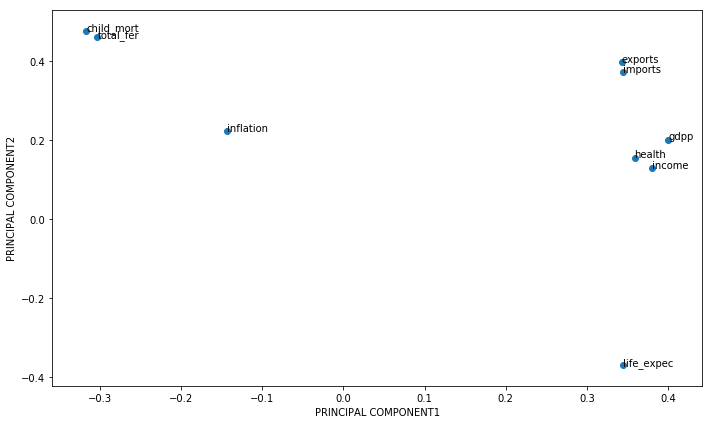

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(pcs_df.PC1 , pcs_df.PC2)
plt.xlabel("PRINCIPAL COMPONENT1")
plt.ylabel("PRINCIPAL COMPONENT2")
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [26]:
print(pca.explained_variance_ratio_.cumsum())

[0.5893721  0.7738227  0.87293756 0.93366223 0.96395362 0.98855195
 0.99794935 0.99950602 1.        ]


In [27]:
# percentage of variance explained by the principal components
print("pca.explained_variance_ratio_",pca.explained_variance_ratio_.round(2)*100)

pca.explained_variance_ratio_ [59. 18. 10.  6.  3.  2.  1.  0.  0.]


### As seen from here max variance is expalined by PC1 i.e 59% variance.

### 3 components can explain about 88% of data ,that is  a good reduction in #dimension from 9 component to 3 components and  explaining around 88% variance.

In [28]:
# using incremental P.C.A to increase efficiency.
from sklearn.decomposition import IncrementalPCA
pca_final= IncrementalPCA(n_components=3)

In [29]:
pca_df= pca_final.fit_transform(dat2)

In [30]:
pca_df.shape

(167, 3)

In [31]:
pc=np.transpose(pca_df)

### creating correlation matrix for principal components.

In [32]:
corrmatrix= np.corrcoef(pca_df.transpose())

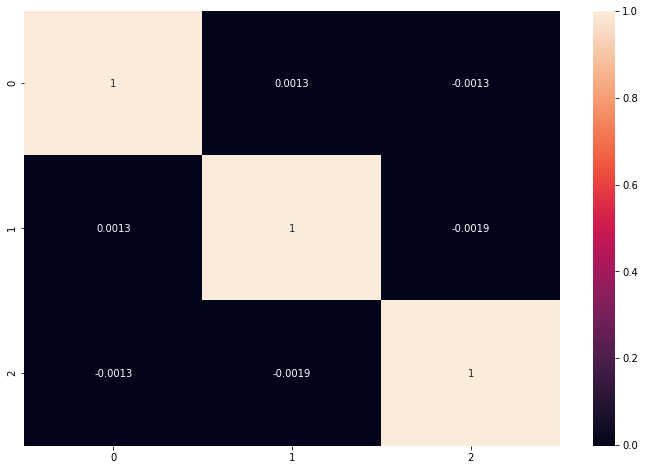

In [33]:
## plotting correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [34]:
corrmatrix_nodiag = corrmatrix - np.diagflat(corrmatrix.diagonal())
print("max corr:",corrmatrix_nodiag.max(), ", min corr: ", corrmatrix_nodiag.min(),)

max corr: 0.0012693665991119756 , min corr:  -0.0018789076948725052


In [35]:
# matrix according to Principal cimponents.
rownames=list(dat['country'])
pcs_df2= pd.DataFrame({'country':rownames, 'PC1':pc[0], 'PC2':pc[1], 'PC3':pc[2]})
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637447,1.469018,-0.541363
1,Albania,-0.022254,-1.431884,-0.020702
2,Algeria,-0.457630,-0.673304,0.961871
3,Angola,-2.724466,2.174591,0.606664
4,Antigua and Barbuda,0.649919,-1.024336,-0.250117


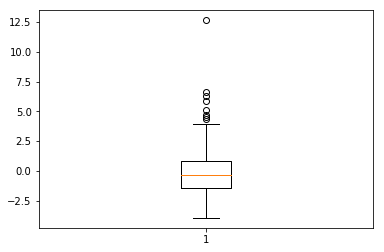

In [36]:
## outlier anaalysis before furthering to clustering.
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.00)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1 ) & (pcs_df2.PC1 <= Q3 )]

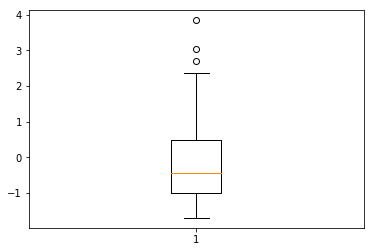

In [37]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.00)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1 ) & (pcs_df2.PC2 <= Q3 )]

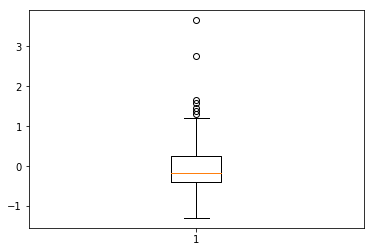

In [38]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.00)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3 )]

In [39]:
#after outlier analysis,the shape of df
pcs_df2.shape

(142, 4)

In [40]:
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637447,1.469018,-0.541363
1,Albania,-0.022254,-1.431884,-0.020702
2,Algeria,-0.457630,-0.673304,0.961871
4,Antigua and Barbuda,0.649919,-1.024336,-0.250117
6,Armenia,-0.332616,-1.274476,0.176623


In [41]:
pcs_df2.describe(percentiles=[0.23,0.50,0.75,0.90,0.99])

,PC1,PC2,PC3
count,142.000000,142.000000,142.000000
mean,-0.211906,-0.288520,-0.130183
std,1.693088,0.910037,0.528462
min,-3.063498,-1.696946,-1.296021
23%,-1.586224,-1.022058,-0.428218
50%,-0.364142,-0.532377,-0.188079
75%,0.662275,0.362477,0.171669
90%,2.529154,1.146845,0.646597
99%,3.795213,1.866566,1.137625
max,3.815673,2.103440,1.177756


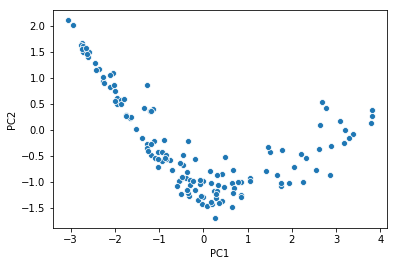

In [42]:
## let's do the scatter plot and see the spread of the data.
sns.scatterplot(pcs_df2.PC1,pcs_df2.PC2)
plt.show()

In [43]:
##after creating PCAs now we'll proceed further to the clustering part.

##  Clustering.

In [44]:
## calcluting the hopkins stastistic.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
hopkins(pcs_df2.drop(['country'],axis=1))

0.8144300088222409

In [46]:
dat3 = pcs_df2
dat3_1 = standard_scaler.fit_transform(dat3.drop(['country'],axis=1))

## K-means clustering.

In [47]:
##  first let's check the silhoutee score to make out ideal no of clusters.
from sklearn.metrics import silhouette_score
sse=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(dat3_1)
    sse.append([k,silhouette_score(dat3_1,kmeans.labels_)])

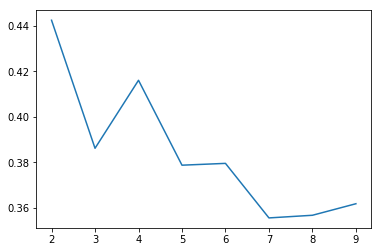

In [48]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1]);

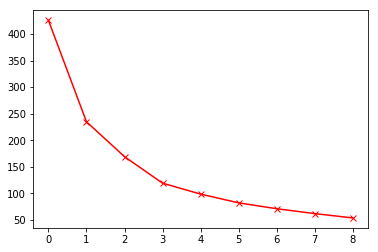

In [49]:
# Silhoutte score reaches max at k=4, indicating that k=4 will be ideal.
# now ,lets check the elbow curve method to identify no.of clusters
ssd=[]
for num_clusters in list(range(1,10)):
    model_clus=KMeans(n_clusters=num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd,'rx-')

In [50]:
model=KMeans(n_clusters=4, max_iter=50, random_state=50)
clus=model.fit(dat3_1)

In [51]:
dat4=dat3
dat4.index= pd.RangeIndex(len(dat4.index))
dat_km= pd.concat([dat4, pd.Series(model.labels_)],axis=1)
dat_km.columns= ['country','PC1','PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637447,1.469018,-0.541363,1
1,Albania,-0.022254,-1.431884,-0.020702,2
2,Algeria,-0.457630,-0.673304,0.961871,3
3,Antigua and Barbuda,0.649919,-1.024336,-0.250117,2
4,Armenia,-0.332616,-1.274476,0.176623,2


In [52]:
dat_km['ClusterID'].value_counts()

2    63
1    32
0    25
3    22
Name: ClusterID, dtype: int64

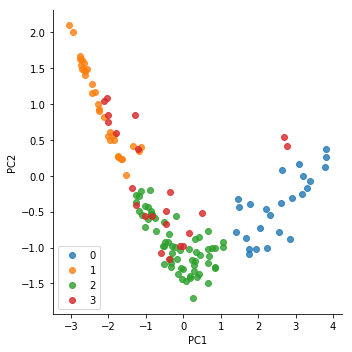

In [53]:
# now again visualizind spread of the data.
sns.lmplot(x='PC1', y='PC2', data=dat_km, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower left')

In [54]:
# now generating mean of the variables for each cluster.
dat5= pd.merge(dat,dat_km,on='country')
dat6=dat5[['country','child_mort','exports','imports','health','income',
           'inflation','life_expec','total_fer','gdpp','ClusterID']]
clus_child_mort= pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clus_exp= pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clus_imp= pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clus_hlth=  pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clus_inc=  pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clus_infl=  pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clus_life_exp=  pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clus_total_fer=  pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clus_gdpp=  pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df=pd.concat([pd.Series([0,1,2,3]),clus_child_mort, clus_exp, clus_imp, clus_hlth, clus_inc, clus_infl, clus_life_exp, 
              clus_total_fer, clus_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health","Income","Inflation","Life_Expectancy",
              "Total_Fertility","GDPpercapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpercapita
0,0,4.972000,13549.360000,13383.960000,3417.400000,34832.000000,1.432920,3417.400000,1.726000,34532.000000
1,1,85.065625,410.406250,585.625000,93.187500,2712.687500,6.546406,93.187500,4.903750,1282.937500
2,2,21.592063,2706.777778,3096.952381,411.984127,11149.841270,4.393000,411.984127,2.273333,6077.492063
3,3,37.836364,4184.409091,2855.772727,296.272727,15668.181818,15.909091,296.272727,2.974545,7255.454545


#### VARIABLES LIKE CHILD MORTALITY ,GDP,INFLATION,INCOME ARE GOOD INDICATORS OF FINANCIAL AND SOCIAL HEALTH OF A COUNTRY.

## ANALYSING THE CLUSTERS.

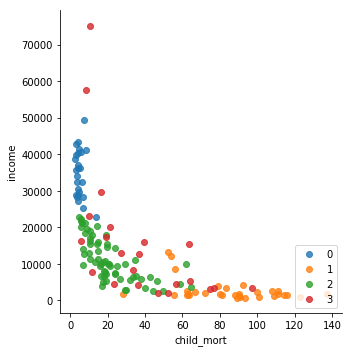

In [55]:
sns.lmplot(x='child_mort', y='income', data=dat6, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

### Cluster1 countries are low in income and high in child mortality,it can be analysed from here.

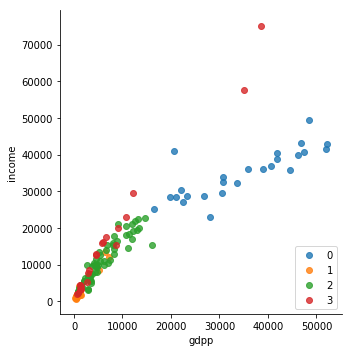

In [56]:
sns.lmplot(x='gdpp', y='income', data=dat6, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


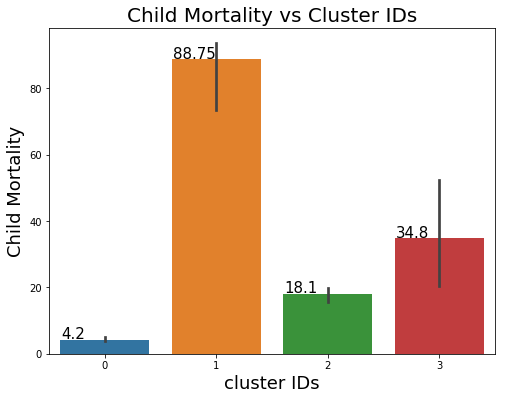

In [57]:
plt.figure(figsize=(8,6))
figx=sns.barplot(x='ClusterID', y='child_mort',estimator=np.median, data=dat6)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Child Mortality",fontsize=18,color='black')
plt.title("Child Mortality vs Cluster IDs",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

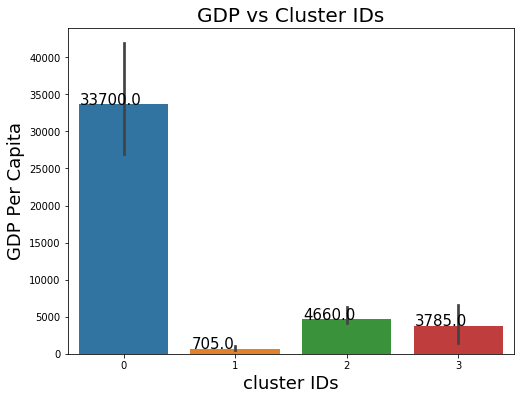

In [58]:
plt.figure(figsize=(8,6))
fig=sns.barplot(x='ClusterID', y='gdpp',estimator=np.median,data=dat6)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("GDP Per Capita",fontsize=18,color='black')
plt.title("GDP vs Cluster IDs",fontsize=20,color='black')

for i in fig .patches:
 # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

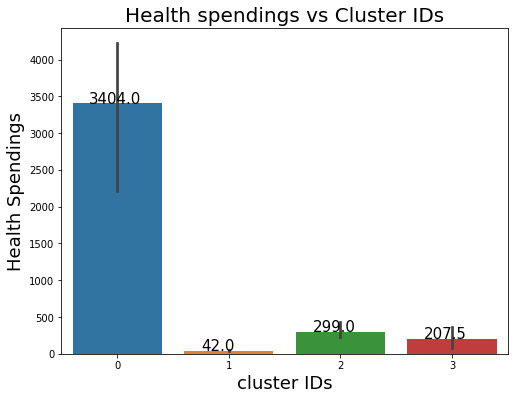

In [59]:
plt.figure(figsize=(8,6))
fig1=sns.barplot(x='ClusterID', y='health',estimator=np.median,data=dat6)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Health Spendings",fontsize=18,color='black')
plt.title("Health spendings vs Cluster IDs",fontsize=20,color='black')

for i in fig1.patches:
    fig1.annotate(format(i.get_height()), (i.get_x()+0.15, i.get_height()+0.90),fontsize=15)

plt.show()

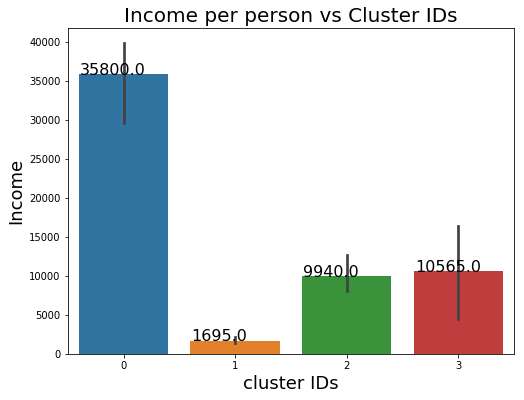

In [60]:
plt.figure(figsize=(8,6))
fig2=sns.barplot(x='ClusterID', y='income',data=dat6,estimator=np.median)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Income",fontsize=18,color='black')
plt.title("Income per person vs Cluster IDs",fontsize=20,color='black')

for i in fig2.patches:
     # get_x pulls left or right; get_height pushes up or down
    fig2.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()),0)), fontsize=16, color='black',
                rotation=0)
plt.show()

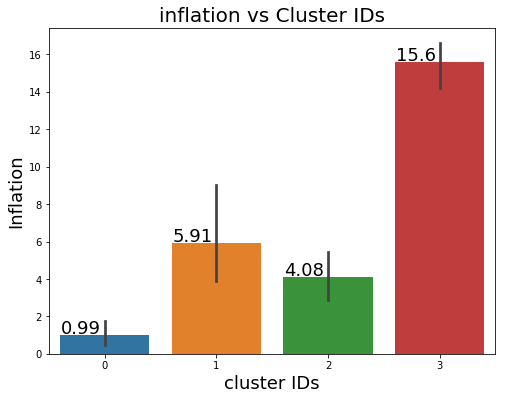

In [61]:
plt.figure(figsize=(8,6))
fig3=sns.barplot(x='ClusterID', y='inflation',estimator=np.median,data=dat6)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Inflation",fontsize=18,color='black')
plt.title("inflation vs Cluster IDs",fontsize=20,color='black')

# set individual bar lables using above list
for i in fig3.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()+.01, i.get_height()+0.1, \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.show()

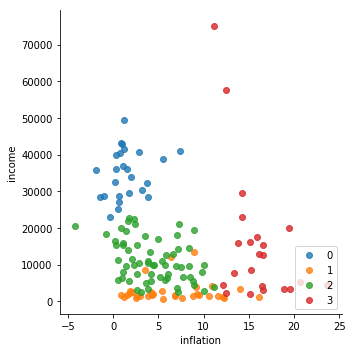

In [62]:
sns.lmplot(x='inflation', y='income', data=dat6, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

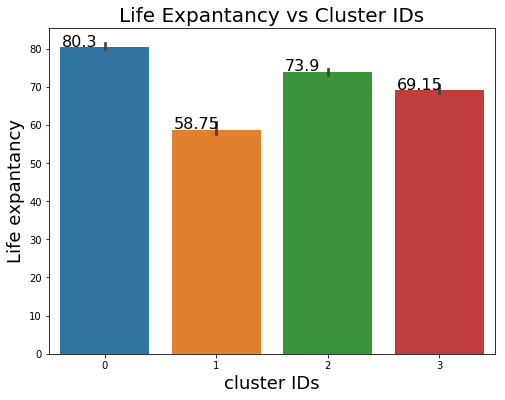

In [63]:
plt.figure(figsize=(8,6))
fig4=sns.barplot(x='ClusterID', y='life_expec',estimator=np.median,data=dat6)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Life expantancy",fontsize=18,color='black')
plt.title("Life Expantancy vs Cluster IDs",fontsize=20,color='black')

for i in fig4.patches:
    fig4.annotate(format(i.get_height()), (i.get_x()+0.015, i.get_height()+0.25),fontsize=16)

plt.show()

## from the analysis  it is evident that countries belonging to cluster-1 need to be foccused on.

In [64]:
dat6[dat6['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.0,248.0,42.0,1610,9.440,56.2,5.82,553,1
14,Benin,111.0,180.0,282.0,31.0,1820,0.885,61.8,5.36,758,1
18,Botswana,52.5,2769.0,3258.0,527.0,13300,8.920,57.1,2.88,6350,1
21,Burkina Faso,116.0,110.0,170.0,39.0,1430,6.810,57.9,5.87,575,1
22,Burundi,93.6,21.0,91.0,27.0,764,12.300,57.7,6.26,231,1
24,Cameroon,108.0,291.0,354.0,67.0,2660,1.910,57.3,5.11,1310,1
30,Comoros,88.2,127.0,398.0,35.0,1410,3.870,65.9,4.75,769,1
33,Cote d'Ivoire,111.0,617.0,528.0,65.0,2690,5.390,56.3,5.27,1220,1
41,Eritrea,55.2,23.0,112.0,13.0,1420,11.600,61.7,4.61,482,1
47,Gambia,80.3,134.0,240.0,32.0,1660,4.300,65.5,5.71,562,1


# HEIRARCHICAL CLUSTERING.

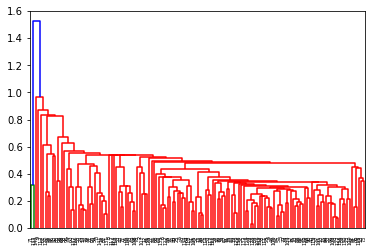

In [65]:
mergings=linkage(dat3_1, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

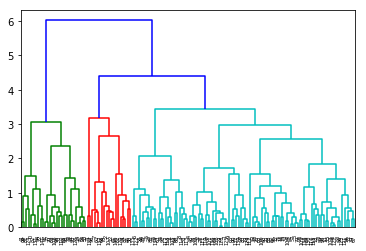

In [66]:
mergings=linkage(dat3_1, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [67]:
# proceeding with the cluster formation.
clustercut= pd.Series(cut_tree(mergings, n_clusters=4).reshape(-1,))
dat3_hc=pd.concat([dat3,clustercut],axis=1)
dat3_hc.columns= ['country','PC1','PC2','PC3','ClusterID']
dat3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637447,1.469018,-0.541363,0
1,Albania,-0.022254,-1.431884,-0.020702,1
2,Algeria,-0.457630,-0.673304,0.961871,2
3,Antigua and Barbuda,0.649919,-1.024336,-0.250117,1
4,Armenia,-0.332616,-1.274476,0.176623,1


In [68]:
dat7= pd.merge(dat, dat3_hc, on='country')
dat8=dat7[['country','child_mort','exports','imports','health','income','inflation',
           'life_expec','total_fer','gdpp','ClusterID']]
dat8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.0,248.0,42.0,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.0,1988.0,268.0,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1713.0,1400.0,186.0,12900,16.10,76.5,2.89,4460,2
3,Antigua and Barbuda,10.3,5551.0,7186.0,736.0,19100,1.44,76.8,2.13,12200,1
4,Armenia,18.1,670.0,1459.0,142.0,6700,7.77,73.3,1.69,3220,1


In [69]:
dat8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 141
Data columns (total 11 columns):
country       142 non-null object
child_mort    142 non-null float64
exports       142 non-null float64
imports       142 non-null float64
health        142 non-null float64
income        142 non-null int64
inflation     142 non-null float64
life_expec    142 non-null float64
total_fer     142 non-null float64
gdpp          142 non-null int64
ClusterID     142 non-null int32
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 12.8+ KB


In [70]:
hir_clusters_child_mort = pd.DataFrame(dat8.groupby(["ClusterID"]).child_mort.mean())
hir_clusters_exports = pd.DataFrame(dat8.groupby(["ClusterID"]).exports.mean())
hir_clusters_hlth = pd.DataFrame(dat8.groupby(["ClusterID"]).health.mean())
hir_clusters_imp = pd.DataFrame(dat8.groupby(["ClusterID"]).imports.mean())
hir_clusters_inc = pd.DataFrame(dat8.groupby(["ClusterID"]).income.mean())
hir_clusters_infl = pd.DataFrame(dat8.groupby(["ClusterID"]).inflation.mean())
hir_clusters_life_exp = pd.DataFrame(dat8.groupby(["ClusterID"]).life_expec.mean())
hir_clusters_total_fer = pd.DataFrame(dat8.groupby(["ClusterID"]).total_fer.mean())
hir_clusters_gdpp = pd.DataFrame(dat8.groupby(["ClusterID"]).gdpp.mean())


In [71]:
df_hir = pd.concat([pd.Series([0,1,2,3]), hir_clusters_child_mort, hir_clusters_exports, hir_clusters_hlth,
                    hir_clusters_imp, hir_clusters_inc, hir_clusters_infl, hir_clusters_life_exp, hir_clusters_total_fer, hir_clusters_gdpp], axis=1)
df_hir.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df_hir

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,89.603571,258.642857,58.678571,424.214286,1990.928571,6.364464,58.953571,5.145000,892.642857
1,1,23.514085,2721.915493,404.028169,3035.309859,11112.957746,4.978577,72.388732,2.325915,5981.126761
2,2,39.210526,4716.052632,323.947368,3148.736842,17383.157895,16.421053,69.505263,3.081053,8136.947368
3,3,4.820833,13514.500000,3516.916667,13502.625000,34570.833333,1.182625,80.137500,1.707917,35108.333333


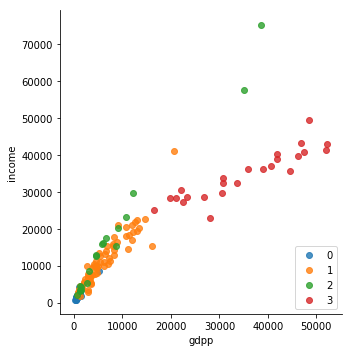

In [72]:
sns.lmplot(x='gdpp', y='income', data=dat8, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

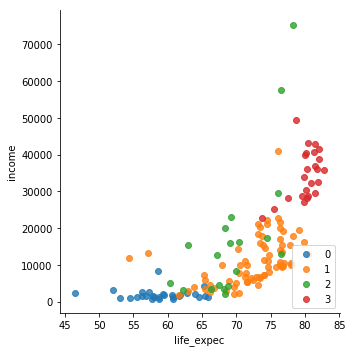

In [73]:
sns.lmplot(x='life_expec', y='income', data=dat8, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

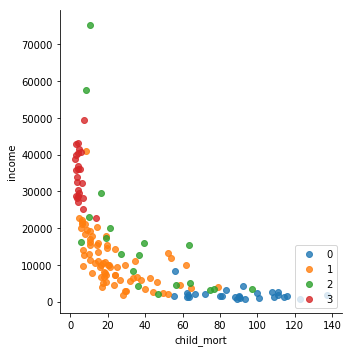

In [74]:
sns.lmplot(x='child_mort', y='income', data=dat8, fit_reg=False, hue='ClusterID', legend=False)
plt.legend(loc='lower right')

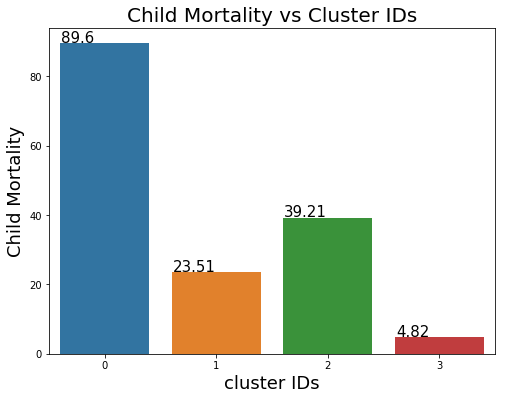

In [75]:
plt.figure(figsize=(8,6))
figh1=sns.barplot(x='ClusterID', y='child_mort',estimator=np.median, data=df_hir)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Child Mortality",fontsize=18,color='black')
plt.title("Child Mortality vs Cluster IDs",fontsize=20,color='black')

for i in figh1.patches:
     # get_x pulls left or right; get_height pushes up or down
    figh1.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

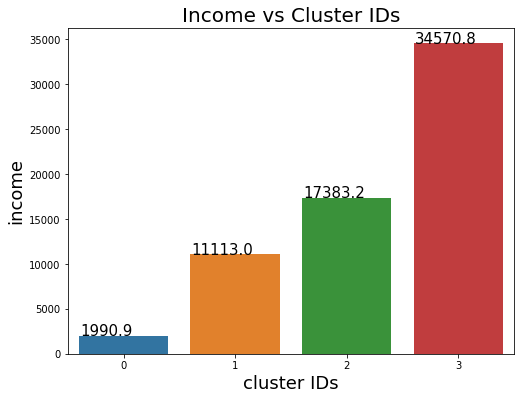

In [76]:
plt.figure(figsize=(8,6))
figh2=sns.barplot(x='ClusterID', y='income',estimator=np.median, data=df_hir)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("income",fontsize=18,color='black')
plt.title("Income vs Cluster IDs",fontsize=20,color='black')

for i in figh2.patches:
     # get_x pulls left or right; get_height pushes up or down
    figh2.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 1)), fontsize=15, color='black',
                rotation=0)

plt.show()

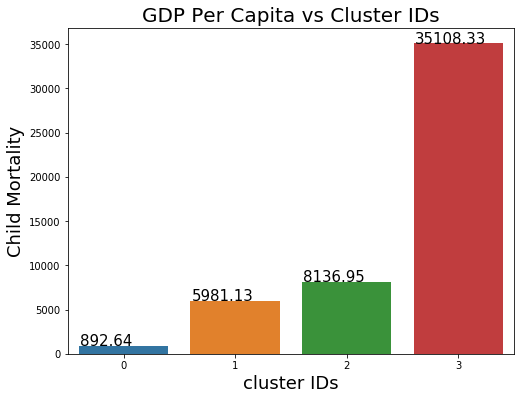

In [77]:
plt.figure(figsize=(8,6))
figh3=sns.barplot(x='ClusterID', y='gdpp',estimator=np.median, data=df_hir)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Child Mortality",fontsize=18,color='black')
plt.title("GDP Per Capita vs Cluster IDs",fontsize=20,color='black')

for i in figh3.patches:
     # get_x pulls left or right; get_height pushes up or down
    figh3.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

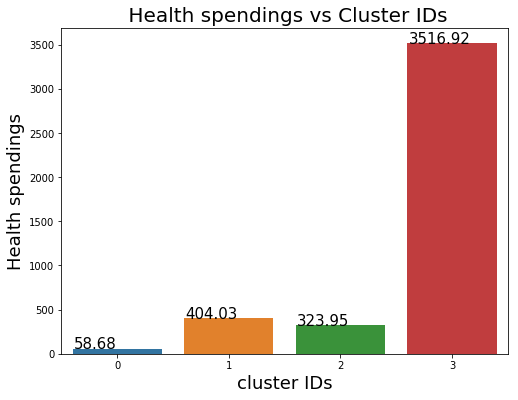

In [78]:
plt.figure(figsize=(8,6))
figh4=sns.barplot(x='ClusterID', y='health',estimator=np.median, data=df_hir)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Health spendings",fontsize=18,color='black')
plt.title(" Health spendings vs Cluster IDs",fontsize=20,color='black')

for i in figh4.patches:
     # get_x pulls left or right; get_height pushes up or down
    figh4.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

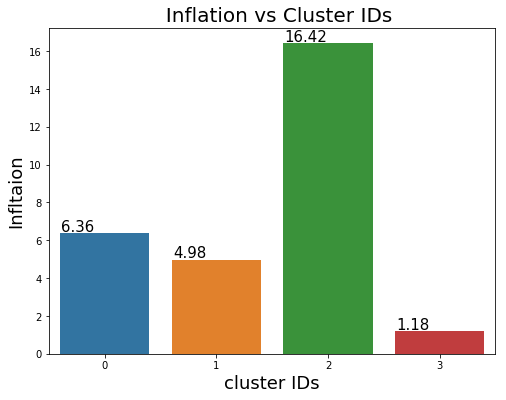

In [79]:
plt.figure(figsize=(8,6))
figh5=sns.barplot(x='ClusterID', y='inflation',estimator=np.median, data=df_hir)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("Infltaion",fontsize=18,color='black')
plt.title("  Inflation vs Cluster IDs",fontsize=20,color='black')

for i in figh5.patches:
     # get_x pulls left or right; get_height pushes up or down
    figh5.text(i.get_x()+.01, i.get_height()+0.1, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

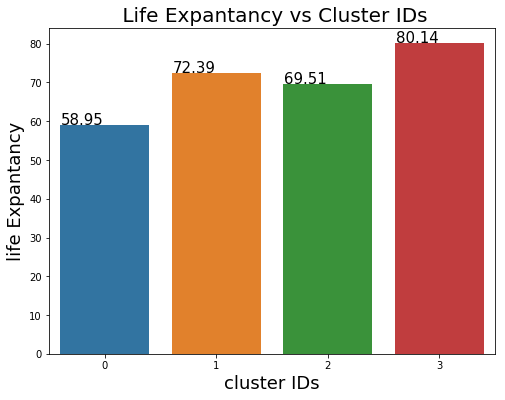

In [80]:
plt.figure(figsize=(8,6))
figh6=sns.barplot(x='ClusterID', y='life_expec',estimator=np.median, data=df_hir)
plt.xlabel("cluster IDs",fontsize=18,color='black')
plt.ylabel("life Expantancy",fontsize=18,color='black')
plt.title(" Life Expantancy vs Cluster IDs",fontsize=20,color='black')

for i in figh6.patches:
     # get_x pulls left or right; get_height pushes up or down
    figh6.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

### Observatuions from heirarchical clustering.

###  1) Life expantancy is lowest in cluster-0.
### 2) Inflation is highest in cluster-2.
### 3) Cluster -0 countries spend the least  in health among clusters.
### 4) cluster -0 counteries are low in GDP.
### 5) Child mortatlity is highest in cluster-0 countries.
### 6) Income per person lowest in cluster-0 countries.

## Hence we can say that countries belonging to cluster -0 are in need of help.

In [81]:
hc=pd.DataFrame(dat8[dat8['ClusterID']==0])
hc

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.0,248.0,42.0,1610,9.440,56.2,5.82,553,0
14,Benin,111.0,180.0,282.0,31.0,1820,0.885,61.8,5.36,758,0
21,Burkina Faso,116.0,110.0,170.0,39.0,1430,6.810,57.9,5.87,575,0
22,Burundi,93.6,21.0,91.0,27.0,764,12.300,57.7,6.26,231,0
24,Cameroon,108.0,291.0,354.0,67.0,2660,1.910,57.3,5.11,1310,0
30,Comoros,88.2,127.0,398.0,35.0,1410,3.870,65.9,4.75,769,0
33,Cote d'Ivoire,111.0,617.0,528.0,65.0,2690,5.390,56.3,5.27,1220,0
41,Eritrea,55.2,23.0,112.0,13.0,1420,11.600,61.7,4.61,482,0
47,Gambia,80.3,134.0,240.0,32.0,1660,4.300,65.5,5.71,562,0
54,Guinea,109.0,196.0,280.0,32.0,1190,16.100,58.0,5.34,648,0


In [82]:
km=pd.DataFrame (dat6[dat6['ClusterID']==1])
km

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.0,248.0,42.0,1610,9.440,56.2,5.82,553,1
14,Benin,111.0,180.0,282.0,31.0,1820,0.885,61.8,5.36,758,1
18,Botswana,52.5,2769.0,3258.0,527.0,13300,8.920,57.1,2.88,6350,1
21,Burkina Faso,116.0,110.0,170.0,39.0,1430,6.810,57.9,5.87,575,1
22,Burundi,93.6,21.0,91.0,27.0,764,12.300,57.7,6.26,231,1
24,Cameroon,108.0,291.0,354.0,67.0,2660,1.910,57.3,5.11,1310,1
30,Comoros,88.2,127.0,398.0,35.0,1410,3.870,65.9,4.75,769,1
33,Cote d'Ivoire,111.0,617.0,528.0,65.0,2690,5.390,56.3,5.27,1220,1
41,Eritrea,55.2,23.0,112.0,13.0,1420,11.600,61.7,4.61,482,1
47,Gambia,80.3,134.0,240.0,32.0,1660,4.300,65.5,5.71,562,1


## the final list of countries which are in dire need of help

In [83]:
km.loc[km['country'].isin(hc['country']), :]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.0,248.0,42.0,1610,9.440,56.2,5.82,553,1
14,Benin,111.0,180.0,282.0,31.0,1820,0.885,61.8,5.36,758,1
21,Burkina Faso,116.0,110.0,170.0,39.0,1430,6.810,57.9,5.87,575,1
22,Burundi,93.6,21.0,91.0,27.0,764,12.300,57.7,6.26,231,1
24,Cameroon,108.0,291.0,354.0,67.0,2660,1.910,57.3,5.11,1310,1
30,Comoros,88.2,127.0,398.0,35.0,1410,3.870,65.9,4.75,769,1
33,Cote d'Ivoire,111.0,617.0,528.0,65.0,2690,5.390,56.3,5.27,1220,1
41,Eritrea,55.2,23.0,112.0,13.0,1420,11.600,61.7,4.61,482,1
47,Gambia,80.3,134.0,240.0,32.0,1660,4.300,65.5,5.71,562,1
54,Guinea,109.0,196.0,280.0,32.0,1190,16.100,58.0,5.34,648,1


In [84]:
km.loc[km['country'].isin(hc['country']), :].shape

(28, 11)

# The final Report.

## from here we can say that all the countries obtained thru heirarchical clustering are there in countries obtained thru K-means so we can say that countries obtained thru heirarchical clustering are the countries which are in dire need of help, so in total there are 28 countries which need help.

### we can see that we got different answers from k-means method and heirarachical method 

## For outliers.
### Removed the upper range of percntiles ,i.e above 95 percentiles and kept all the record lower than it so that in the process of outlier removal, we dont miss out those countries which lie at very low percentiles and indeed are those countries which are in dire need  of help.